In [2]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [14]:
############ BASIC STATISTICS
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])

np.mean(x) # можем да пресметнем basic descriptive statistic от функциите в numpy
np.median(x)
x.min(), x.max()
x.var() # variance, дисперсия, сигма^2; това е за цялата популация, т.е. дели се на n
x.std() # сигма, standard deviation, стандартно отклонение; това е за цялата популация. За извадка трябва да използваме ddof = 1

x.var(ddof=1), x.std(ddof=1) # за извадката, т.е. дели се на (n-1)

(3.5085714285714293, 1.8731181032095732)

In [39]:
#### Случайни числа
np.random.rand(5) # генерира вектор 5 uniformly distributed numbers in the interval [0, 1)
np.random.randn(6) # генерира вектор 6 нормално distributed numbers със средно 0 и стандартно отклонение 1
np.random.randn(2, 4) # 2 на 4 array с числа
np.random.randint(10, size=10) # вектор 10 uniformly разпределени цели числа in the interval [low=0, 10)
np.random.randint(low=10, high=20, size=(2, 10)) # 2 на 4 числа в [low, high)

# случайни числа с разпределение
np.random.randn(6) # нормално distributed numbers със средно 0 и стандартно отклонение 1
np.random.chisquare(2, 4) # chi-square distribution
np.random.standard_t(1, size=(2,3)) # t-distribution / Student's distribution
np.random.f(5, 2, size=7) # F-distribution

np.random.binomial(10, 0.5, size=10) # биномно разпределение
np.random.poisson(5, size=10) # дискретно Поасоново



### хистограми на генерираните числа
# fig, axes = plt.subplots(1, 3, figsize=(12, 3))
# axes[0].hist(np.random.rand(10000))
# axes[0].set_title("rand")
# axes[1].hist(np.random.randn(10000))
# axes[1].set_title("randn")
# axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
# axes[2].set_title("randint(low=1, high=10)")

# # sampling от някакво множество
# np.random.choice(x, 5, replace=False) # извадката може да е with replacement; ПОДОБНО Е на .rvs() в stats

array([2, 2, 3, 2, 2, 7, 1, 4, 9, 7])

In [76]:
######## Random variables and distributions

X = stats.norm(1, 0.5) # дефинираме random variable, напр. на нормално разпределение средно = 1 и std = 0,5

X.mean(), X.median(), X.var(), X.std()

#[X.moment(n) for n in range(5)] # пресмятане на нецентрални моменти от произволен ред
#X.pdf([0, 1, 2]) # probability distribution function, пресметната в показаните точки
X.cdf([0, 1, 2]) # cumulative distribution function, пресметната в показаните точки
X.sf([0,1,2]) # survival function = 1-cdf, пресметната в показаните точки, т.е. получаваме 3 стойности

X.interval(0.95) # удобно за пресмятане на доверителен интервал; интервал около средното

X.rvs(10) # random variable sampling, може да го поискаме като tuple (2,4); НЕ Е генериране на числа с разпределение


array([ 0.47689322,  0.81875613, -0.41247221,  0.96537703,  0.66583467,
        1.67342491,  0.86960973,  0.73411488,  0.6319065 ,  1.40872225])

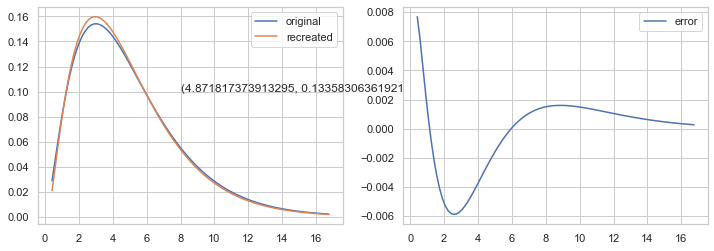

In [102]:
####### Фит на разпределения: използва се maximum likelihood fit

# Ще го демонстрираме с chi-square distribution
X = stats.chi2(df=5) # разглеждаме chi-square с 5 степени на свобода
X_samples = X.rvs(500) # от него вземаме 500 random variable samples

df, loc, scale = stats.chi2.fit(X_samples) # връща параметри с max likelihood за разпределението: shape, location, scale
#df, loc, scale
Y = stats.chi2(df=df, loc=loc, scale=scale) # даваме тези параметри на генератор за chi-square distribution

# разпределението на Y трябва да прилича много на разпределението X, ще ги изчертаем на една графика
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()
#axes[0].text(8, 0.1, (df, loc, scale))

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()


C:\Users\iglik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


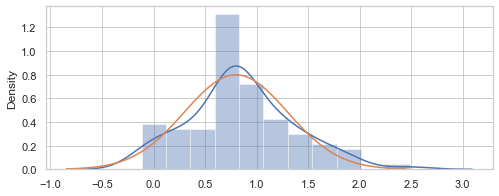

In [137]:
####### Hypothesis Testing за една променлива

# Ще разледаме хипотеза за mean. Симулираме извадка като извадим 100 случайни samples от разпределение с малко по-различно
# средно от това в нулевата хипотеза. Индекси 0 съответстват на нулевата хипотеза. mu = 0.8, mu_0 = 1
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma) # това симулира нашата популация
n = 100
X_samples = X.rvs(n) # това симулира нашата извадка

z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n)) # test statistics
# Ако не знаем sigma, използваме sigma_x от извадката и тогава това e t-score и използваме t-dist, за да намерим p-value
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
z, t # може да се види разликата между двете 

# разглеждаме двустранен тест с ниво 5%
stats.norm().ppf(0.025) # функцията ppf (percent-point function) е обратната на cdf (cumulative density function)
# Since the observed statistics is about -2.83, which is smaller than the threshold value -1.96 for a two-sided
# test with significance 5%, we have sufficient grounds to reject the null hypothesis in this case.

2 * stats.norm().cdf(-abs(z)) # все пак ще изчислим p-value чрез cdf на нормалното разпределение
2 * stats.t(df=(n-1)).cdf(-abs(t)) # може да използваме t-distribution за същото

# Вместо да изчисляваме test statistics и p-values, може да използваме вградени SciPy Functions for Test
t, p = stats.ttest_1samp(X_samples, mu) # t-test
t, p

# Разпределението на нулевата хипотеза vs на извадката
fig, ax = plt.subplots(figsize=(8, 3))
sns.distplot(X_samples, ax=ax) # тъмносиньо

x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x)) # светлозелено

In [134]:
#### Хипотезен тест за две променливи
# Рaзглеждаме хипотеза за равенство на две means (independent). Създаваме две random variables с произволни средни
# Вземаме извадка от 50 елемента от всяка популация.
n, sigma = 50, 1.0
mu1, mu2 = np.random.rand(2) # двете средни; избираме да ги генерираме с random

X1 = stats.norm(mu1, sigma) # първата random variable
X1_sample = X1.rvs(n) # извадката на първата random variable

X2 = stats.norm(mu2, sigma) # втората random variable
X2_sample = X2.rvs(n) # извадката на втората random variable

t, p = stats.ttest_ind(X1_sample, X2_sample) # t-test, подходящ за случая за сравняване на две средни
t,p # понякога не можем да отхвърлим нулевата хипотеза, въпреки че двете средни наистина са различни: грешка тип II



(-1.3976002856833545, 0.16538898203681196)

C:\Users\iglik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

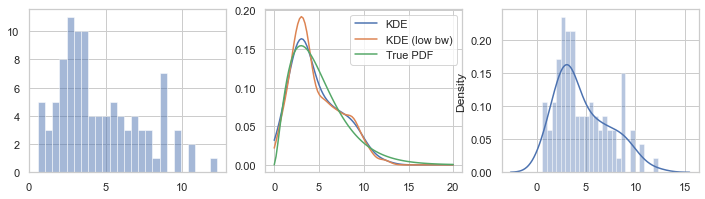

In [140]:
####### Nonparametric Methods: Kerner Density Estimation (KDE) - графика, базирана на "изгладена" хистограма

# Разглеждаме извадка от популация с неизвестно нам разпределение, което тук ще симулираме с chi-square

X = stats.chi2(df=5) # популацията с неизвестно разпределение, което тук се симулира от chi2 с 5 степени на свобода
X_samples = X.rvs(100) # извадка от 100 елемента

kde = stats.kde.gaussian_kde(X_samples) # изчисляваме kde за данните, които имаме; by default се използва оптималният bandwidth
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25) # може да положим друга (малка) стойност за bandwidth

# The gaussian_kde function returns an estimate of the distribution function, which we, for example, can graph or use for 
# other applications. Here we plot a histogram of the data and the two kernel-density estimates (with default and 
# explicitly set bandwidth). For reference we also plot the true probability distribution function for the samples.
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, alpha=0.5, bins=25)

axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()

sns.distplot(X_samples, bins=25, ax=axes[2])
#
#
#